In [1]:
%matplotlib inline

In [2]:
import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
from tqdm import tqdm_notebook
tqdm_notebook()

sns.set_style('whitegrid')

0it [00:00, ?it/s]

In [3]:
# Load data 
data = pd.read_csv('./netflix_titles.csv', usecols=['title', 'listed_in', 'description'])
#data=data[0:1500]


data


,title,listed_in,description
0,Norm of the North: King Sized Adventure,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...
6229,Red vs. Blue,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,Maron,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,Little Baby Bum: Nursery Rhyme Friends,Movies,Nursery rhymes and original music for children...
6232,A Young Doctor's Notebook and Other Stories,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
# Lowercase columns for convenience
data.columns = list(map(str.lower, data.columns))

In [5]:
reformat_string = lambda x: unidecode(str.lower(x))

In [6]:
data['title'] = data['title'].apply(reformat_string)
data['listed_in'] = data['listed_in'].apply(reformat_string)
data['description']=data['description'].str.lower()

In [7]:
data.index

RangeIndex(start=0, stop=6234, step=1)

In [8]:
add_title=lambda x, c:'{}_'.format(c)+x
for i in range(0,len(data)):
    data['title'][i]=add_title(data['title'][i],data.index[i])

In [9]:
data

,title,listed_in,description
0,0_norm of the north: king sized adventure,"children & family movies, comedies",before planning an awesome wedding for his gra...
1,1_jandino: whatever it takes,stand-up comedy,jandino asporaat riffs on the challenges of ra...
2,2_transformers prime,kids' tv,"with the help of three human allies, the autob..."
3,3_transformers: robots in disguise,kids' tv,when a prison ship crash unleashes hundreds of...
4,4_#realityhigh,comedies,when nerdy high schooler dani finally attracts...
...,...,...,...
6229,6229_red vs. blue,"tv action & adventure, tv comedies, tv sci-fi ...","this parody of first-person shooter games, mil..."
6230,6230_maron,tv comedies,"marc maron stars as marc maron, who interviews..."
6231,6231_little baby bum: nursery rhyme friends,movies,nursery rhymes and original music for children...
6232,6232_a young doctor's notebook and other stories,"british tv shows, tv comedies, tv dramas","set during the russian revolution, this comic ..."


In [10]:
len(data)

6234

In [11]:
list=[]
for i in range(0,len(data)):
    a=[]
    for j in range(0,7):
        a.append(0)
    list.append(a)


data.insert(3,'list',list)

In [12]:
data

,title,listed_in,description,list
0,0_norm of the north: king sized adventure,"children & family movies, comedies",before planning an awesome wedding for his gra...,"[0, 0, 0, 0, 0, 0, 0]"
1,1_jandino: whatever it takes,stand-up comedy,jandino asporaat riffs on the challenges of ra...,"[0, 0, 0, 0, 0, 0, 0]"
2,2_transformers prime,kids' tv,"with the help of three human allies, the autob...","[0, 0, 0, 0, 0, 0, 0]"
3,3_transformers: robots in disguise,kids' tv,when a prison ship crash unleashes hundreds of...,"[0, 0, 0, 0, 0, 0, 0]"
4,4_#realityhigh,comedies,when nerdy high schooler dani finally attracts...,"[0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...
6229,6229_red vs. blue,"tv action & adventure, tv comedies, tv sci-fi ...","this parody of first-person shooter games, mil...","[0, 0, 0, 0, 0, 0, 0]"
6230,6230_maron,tv comedies,"marc maron stars as marc maron, who interviews...","[0, 0, 0, 0, 0, 0, 0]"
6231,6231_little baby bum: nursery rhyme friends,movies,nursery rhymes and original music for children...,"[0, 0, 0, 0, 0, 0, 0]"
6232,6232_a young doctor's notebook and other stories,"british tv shows, tv comedies, tv dramas","set during the russian revolution, this comic ...","[0, 0, 0, 0, 0, 0, 0]"


In [13]:
data['listed_in']=data['listed_in'].str.split(", ")

In [14]:
data['listed_in']

0                    [children & family movies, comedies]
1                                       [stand-up comedy]
2                                              [kids' tv]
3                                              [kids' tv]
4                                              [comedies]
                              ...                        
6229    [tv action & adventure, tv comedies, tv sci-fi...
6230                                        [tv comedies]
6231                                             [movies]
6232           [british tv shows, tv comedies, tv dramas]
6233                     [classic & cult tv, tv comedies]
Name: listed_in, Length: 6234, dtype: object

In [15]:
np.array(data['listed_in'].tolist())

array([list(['children & family movies', 'comedies']),
       list(['stand-up comedy']), list(["kids' tv"]), ...,
       list(['movies']),
       list(['british tv shows', 'tv comedies', 'tv dramas']),
       list(['classic & cult tv', 'tv comedies'])], dtype=object)

In [16]:
data['listed_in'][0]

['children & family movies', 'comedies']

In [17]:
for i in range(0,len(data)):
    if 'stand-up comedy' in data['listed_in'][i]:
        list[i][0]=1
    if 'comedies' in data['listed_in'][i]:
        list[i][0]=1
    if 'tv comedies' in data['listed_in'][i]:
        list[i][0]=1
    if 'sci-fi & fantasy' in data['listed_in'][i]:
        list[i][1]=1
    if 'tv sci-fi & fantasy' in data['listed_in'][i]:
        list[i][1]=1
    if "kids' tv" in data['listed_in'][i]:
        list[i][2]=1
    if 'children & family movies' in data['listed_in'][i]:
        list[i][2]=1
    if 'romantic movies' in data['listed_in'][i]:
        list[i][3]=1
    if 'romantic tv shows' in data['listed_in'][i]:
        list[i][3]=1
    if 'horror movies' in data['listed_in'][i]:
        list[i][4]=1
    if 'tv horror' in data['listed_in'][i]:
        list[i][4]=1
    if 'thrillers' in data['listed_in'][i]:
        list[i][4]=1
    if 'tv thrillers' in data['listed_in'][i]:
        list[i][4]=1
    if 'action & adventure' in data['listed_in'][i]:
        list[i][5]=1
    if 'tv action & adventure' in data['listed_in'][i]:
        list[i][5]=1
    if 'documentaries' in data['listed_in'][i]:
        list[i][6]=1
    if 'docuseries' in data['listed_in'][i]:
        list[i][6]=1
    
        
#list=[COMEDY, SF, FAMILY, ROMANTIC, THRILLER, ACTION, DOCU]

In [18]:
data['list']

0       [1, 0, 1, 0, 0, 0, 0]
1       [1, 0, 0, 0, 0, 0, 0]
2       [0, 0, 1, 0, 0, 0, 0]
3       [0, 0, 1, 0, 0, 0, 0]
4       [1, 0, 0, 0, 0, 0, 0]
                ...          
6229    [1, 1, 0, 0, 0, 1, 0]
6230    [1, 0, 0, 0, 0, 0, 0]
6231    [0, 0, 0, 0, 0, 0, 0]
6232    [1, 0, 0, 0, 0, 0, 0]
6233    [1, 0, 0, 0, 0, 0, 0]
Name: list, Length: 6234, dtype: object

In [19]:
data.loc[5]

title                                                  5_apaches
listed_in      [crime tv shows, international tv shows, spani...
description    a young journalist is forced into a life of cr...
list                                       [0, 0, 0, 0, 0, 0, 0]
Name: 5, dtype: object

In [20]:
for i in range(0,len(data)):
    if(data['list'][i]==[0,0,0,0,0,0,0]):
        data=data.drop(i, axis=0)

In [21]:
data

,title,listed_in,description,list
0,0_norm of the north: king sized adventure,"[children & family movies, comedies]",before planning an awesome wedding for his gra...,"[1, 0, 1, 0, 0, 0, 0]"
1,1_jandino: whatever it takes,[stand-up comedy],jandino asporaat riffs on the challenges of ra...,"[1, 0, 0, 0, 0, 0, 0]"
2,2_transformers prime,[kids' tv],"with the help of three human allies, the autob...","[0, 0, 1, 0, 0, 0, 0]"
3,3_transformers: robots in disguise,[kids' tv],when a prison ship crash unleashes hundreds of...,"[0, 0, 1, 0, 0, 0, 0]"
4,4_#realityhigh,[comedies],when nerdy high schooler dani finally attracts...,"[1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...
6228,6228_kikoriki,[kids' tv],a wacky rabbit and his gang of animal pals hav...,"[0, 0, 1, 0, 0, 0, 0]"
6229,6229_red vs. blue,"[tv action & adventure, tv comedies, tv sci-fi...","this parody of first-person shooter games, mil...","[1, 1, 0, 0, 0, 1, 0]"
6230,6230_maron,[tv comedies],"marc maron stars as marc maron, who interviews...","[1, 0, 0, 0, 0, 0, 0]"
6232,6232_a young doctor's notebook and other stories,"[british tv shows, tv comedies, tv dramas]","set during the russian revolution, this comic ...","[1, 0, 0, 0, 0, 0, 0]"


In [22]:
len(data)

4764

In [23]:
data['list'][6233]

[1, 0, 0, 0, 0, 0, 0]

In [24]:
data0=pd.DataFrame(columns=['title','listed_in','description','list'])
data1=pd.DataFrame(columns=['title','listed_in','description','list'])
data2=pd.DataFrame(columns=['title','listed_in','description','list'])
data3=pd.DataFrame(columns=['title','listed_in','description','list'])
data4=pd.DataFrame(columns=['title','listed_in','description','list'])
data5=pd.DataFrame(columns=['title','listed_in','description','list'])
data6=pd.DataFrame(columns=['title','listed_in','description','list'])

a=0
for i in data.index:
    if(data['list'][i][0]==1):
        data0=data0.append(data.loc[i])
        data0['listed_in']='COMEDY'
        #print(data['list'][i])
        a=a+1
print('comedy:{}'.format(a))
b=0
for i in data.index:
    if(data['list'][i][1]==1):
        data1=data1.append(data.loc[i])
        data1['listed_in']='SF'
        #print(data['list'][i])
        b=b+1
print('sf:{}'.format(b))
c=0
for i in data.index:
    if(data['list'][i][2]==1):
        data2=data2.append(data.loc[i])
        data2['listed_in']='FAMILY'
        #print(data['list'][i])
        c=c+1
print('family:{}'.format(c))
d=0
for i in data.index:
    if(data['list'][i][3]==1):
        data3=data3.append(data.loc[i])
        data3['listed_in']='ROMANTIC'
        #print(data['list'][i])
        d=d+1
print('romantic:{}'.format(d))
e=0
for i in data.index:
    if(data['list'][i][4]==1):
        data4=data4.append(data.loc[i])
        data4['listed_in']='THRILLER'
        #print(data['list'][i])
        e=e+1
print('thriller:{}'.format(e))
f=0
for i in data.index:
    if(data['list'][i][5]==1):
        data5=data5.append(data.loc[i])
        data5['listed_in']='ACTION'
        #print(data['list'][i])
        f=f+1
print('action:{}'.format(f))
g=0
for i in data.index:
    if(data['list'][i][6]==1):
        data6=data6.append(data.loc[i])
        data6['listed_in']='DOCU'
        #print(data['list'][i])
        g=g+1
print('docu:{}'.format(g))

comedy:1830
sf:261
family:706
romantic:654
thriller:652
action:723
docu:947


In [25]:
data1

,title,listed_in,description,list
6,6_automata,SF,"in a dystopian future, an insurance adjuster f...","[0, 1, 0, 0, 1, 0, 0]"
30,30_next gen,SF,when lonely mai forms an unlikely bond with a ...,"[1, 1, 1, 0, 0, 0, 0]"
59,59_black panther,SF,"t'challa, the superpowered new leader of the h...","[0, 1, 0, 0, 0, 1, 0]"
90,90_animal world,SF,"an unlucky, debt-ridden teen resorts to his ma...","[0, 1, 0, 0, 0, 1, 0]"
102,102_in the shadow of the moon,SF,a philadelphia detective slowly unravels as he...,"[0, 1, 0, 0, 1, 0, 0]"
...,...,...,...,...
6095,6095_the magicians,SF,when grad student quentin coldwater enters a c...,"[0, 1, 0, 0, 0, 0, 0]"
6169,6169_the 100,SF,a century after earth was devastated by a nucl...,"[0, 1, 0, 0, 0, 1, 0]"
6185,6185_chilling adventures of sabrina,SF,"magic and mischief collide as half-human, half...","[0, 1, 0, 0, 1, 0, 0]"
6203,6203_star trek: the next generation,SF,decades after the adventures of the original e...,"[0, 1, 0, 0, 0, 1, 0]"


In [26]:
data

,title,listed_in,description,list
0,0_norm of the north: king sized adventure,"[children & family movies, comedies]",before planning an awesome wedding for his gra...,"[1, 0, 1, 0, 0, 0, 0]"
1,1_jandino: whatever it takes,[stand-up comedy],jandino asporaat riffs on the challenges of ra...,"[1, 0, 0, 0, 0, 0, 0]"
2,2_transformers prime,[kids' tv],"with the help of three human allies, the autob...","[0, 0, 1, 0, 0, 0, 0]"
3,3_transformers: robots in disguise,[kids' tv],when a prison ship crash unleashes hundreds of...,"[0, 0, 1, 0, 0, 0, 0]"
4,4_#realityhigh,[comedies],when nerdy high schooler dani finally attracts...,"[1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...
6228,6228_kikoriki,[kids' tv],a wacky rabbit and his gang of animal pals hav...,"[0, 0, 1, 0, 0, 0, 0]"
6229,6229_red vs. blue,"[tv action & adventure, tv comedies, tv sci-fi...","this parody of first-person shooter games, mil...","[1, 1, 0, 0, 0, 1, 0]"
6230,6230_maron,[tv comedies],"marc maron stars as marc maron, who interviews...","[1, 0, 0, 0, 0, 0, 0]"
6232,6232_a young doctor's notebook and other stories,"[british tv shows, tv comedies, tv dramas]","set during the russian revolution, this comic ...","[1, 0, 0, 0, 0, 0, 0]"


In [27]:
select0=pd.DataFrame
select1=pd.DataFrame
select2=pd.DataFrame
select3=pd.DataFrame
select4=pd.DataFrame
select5=pd.DataFrame
select6=pd.DataFrame

select0=data0.sample(n=200)
select1=data1.sample(n=200)
select2=data2.sample(n=200)
select3=data3.sample(n=200)
select4=data4.sample(n=200)
select5=data5.sample(n=200)
select6=data6.sample(n=200)

In [28]:
select2

,title,listed_in,description,list
2150,2150_pee-wee's big holiday,FAMILY,a chance encounter with a mysterious stranger ...,"[1, 0, 1, 0, 0, 0, 0]"
5124,5124_all hallows' eve,FAMILY,instead of summoning the spirit of her dearly ...,"[0, 0, 1, 0, 0, 0, 0]"
4597,4597_get santa,FAMILY,when santa gets arrested for trespassing after...,"[1, 0, 1, 0, 0, 0, 0]"
6219,6219_pokemon the series,FAMILY,ash and his pikachu travel to the alola region...,"[0, 0, 1, 0, 0, 0, 0]"
3627,3627_pokemon the movie: i choose you!,FAMILY,when ash tries to pick his first pokémon on hi...,"[0, 0, 1, 0, 0, 0, 0]"
...,...,...,...,...
5465,5465_you vs. wild,FAMILY,"in this interactive series, you'll make key de...","[0, 0, 1, 0, 0, 0, 0]"
926,926_barbie star light adventure,FAMILY,"a hoverboard-riding princess of the cosmos, ba...","[0, 0, 1, 0, 0, 0, 0]"
4365,4365_john mulaney & the sack lunch bunch,FAMILY,john mulaney and his kid pals tackle existenti...,"[1, 0, 1, 0, 0, 0, 0]"
3844,3844_legend quest,FAMILY,"when an evil force threatens his village, a gi...","[0, 0, 1, 0, 0, 0, 0]"


In [29]:
select=pd.concat([select0,select1,select2,select3,select4,select5,select6]).drop_duplicates('title').reset_index(drop=True)
select

,title,listed_in,description,list
0,339_hope aur hum,COMEDY,a multigenerational household navigates daily ...,"[1, 0, 1, 0, 0, 0, 0]"
1,2731_catfight,COMEDY,two college frenemies whose lives aren't what ...,"[1, 0, 0, 0, 0, 0, 0]"
2,4129_banana island ghost,COMEDY,"searching for a soul mate, a ghost negotiates ...","[1, 0, 0, 0, 0, 0, 0]"
3,3210_love you... love you not,COMEDY,a love triangle gets complicated when a female...,"[1, 0, 0, 1, 0, 0, 0]"
4,1917_tanu weds manu,COMEDY,when london-based doctor manu reluctantly retu...,"[1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...
1302,2939_theater of life,DOCU,this documentary follows chef massimo bottura ...,"[0, 0, 0, 0, 0, 0, 1]"
1303,2904_dark tourist,DOCU,"from a nuclear lake to a haunted forest, journ...","[0, 0, 0, 0, 0, 0, 1]"
1304,2471_jiro dreams of sushi,DOCU,"this documentary profiles sushi chef jiro ono,...","[0, 0, 0, 0, 0, 0, 1]"
1305,219_steal a pencil for me,DOCU,this moving documentary chronicles the unshake...,"[0, 0, 0, 0, 0, 0, 1]"


In [30]:
print(len(data))
print(len(select))

4764
1307


In [31]:
(select['listed_in'][1])

'COMEDY'

In [32]:

#select.to_csv("per200select.csv")
#for x in select.index:
#   for y in range(0,len(select['listed_in'][x])):
#       if select['listed_in'][x][y] in (['stand-up comedy','comedies','tv comedies','stand-up comedy & talk shows','sci-fi & fantasy','tv sci-fi & fantasy',"kids' tv",'children & family movies','romantic movies','romantic tv shows','horror movies','tv horror','thrillers','tv thrillers','action & adventure','tv action & adventure','documentaries', 'docuseries']):
#          select['listed_in'][x]=select['listed_in'][x][y]
#select['listed_in']

In [33]:
select

,title,listed_in,description,list
0,339_hope aur hum,COMEDY,a multigenerational household navigates daily ...,"[1, 0, 1, 0, 0, 0, 0]"
1,2731_catfight,COMEDY,two college frenemies whose lives aren't what ...,"[1, 0, 0, 0, 0, 0, 0]"
2,4129_banana island ghost,COMEDY,"searching for a soul mate, a ghost negotiates ...","[1, 0, 0, 0, 0, 0, 0]"
3,3210_love you... love you not,COMEDY,a love triangle gets complicated when a female...,"[1, 0, 0, 1, 0, 0, 0]"
4,1917_tanu weds manu,COMEDY,when london-based doctor manu reluctantly retu...,"[1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...
1302,2939_theater of life,DOCU,this documentary follows chef massimo bottura ...,"[0, 0, 0, 0, 0, 0, 1]"
1303,2904_dark tourist,DOCU,"from a nuclear lake to a haunted forest, journ...","[0, 0, 0, 0, 0, 0, 1]"
1304,2471_jiro dreams of sushi,DOCU,"this documentary profiles sushi chef jiro ono,...","[0, 0, 0, 0, 0, 0, 1]"
1305,219_steal a pencil for me,DOCU,this moving documentary chronicles the unshake...,"[0, 0, 0, 0, 0, 0, 1]"


In [34]:
select['listed_in']

0       COMEDY
1       COMEDY
2       COMEDY
3       COMEDY
4       COMEDY
         ...  
1302      DOCU
1303      DOCU
1304      DOCU
1305      DOCU
1306      DOCU
Name: listed_in, Length: 1307, dtype: object

In [35]:
for i in range(0,len(select)):
    if select['listed_in'][i]=='stand-up comedy':
        select['listed_in'][i]='COMEDY'
    if select['listed_in'][i]=='comedies':
        select['listed_in'][i]='COMEDY'
    if select['listed_in'][i]=='tv comedies':
        select['listed_in'][i]='COMEDY'
    if select['listed_in'][i]=='stand-up comedy & talk shows':
        select['listed_in'][i]='COMEDY'
    if select['listed_in'][i]=='sci-fi & fantasy':
        select['listed_in'][i]='SF'
    if select['listed_in'][i]=='tv sci-fi & fantasy':
        select['listed_in'][i]='SF'
    if select['listed_in'][i]=="kids' tv":
        select['listed_in'][i]='FAMILY'
    if select['listed_in'][i]=='children & family movies':
        select['listed_in'][i]='FAMILY'
    if select['listed_in'][i]=='romantic movies':
        select['listed_in'][i]='ROMANTIC'
    if select['listed_in'][i]=='romantic tv shows':
        select['listed_in'][i]='ROMANTIC'
    if select['listed_in'][i]=='horror movies':
        select['listed_in'][i]='THRILLER'
    if select['listed_in'][i]=='tv horror':
        select['listed_in'][i]='THRILLER'
    if select['listed_in'][i]=='thrillers':
        select['listed_in'][i]='THRILLER'
    if select['listed_in'][i]=='tv thrillers':
        select['listed_in'][i]='THRILLER'
    if select['listed_in'][i]=='action & adventure' :
        select['listed_in'][i]='ACTION'
    if select['listed_in'][i]=='tv action & adventure':
        select['listed_in'][i]='ACTION'
    if select['listed_in'][i]=='documentaries':
        select['listed_in'][i]='DOCU'
    if select['listed_in'][i]=='docuseries':
        select['listed_in'][i]='DOCU'

In [36]:
titles=np.array(select['title'].tolist())

In [37]:
from scipy import spatial

In [38]:
from sent2vec.vectorizer import Vectorizer

In [39]:
select['description']

0       a multigenerational household navigates daily ...
1       two college frenemies whose lives aren't what ...
2       searching for a soul mate, a ghost negotiates ...
3       a love triangle gets complicated when a female...
4       when london-based doctor manu reluctantly retu...
                              ...                        
1302    this documentary follows chef massimo bottura ...
1303    from a nuclear lake to a haunted forest, journ...
1304    this documentary profiles sushi chef jiro ono,...
1305    this moving documentary chronicles the unshake...
1306    this documentary highlights the endangered exi...
Name: description, Length: 1307, dtype: object

In [40]:
sentences=np.array(select['description'].tolist())
#list type으로 변환

In [41]:
len(select)

1307

In [42]:
sentences

array(['a multigenerational household navigates daily life, evolving relationships and clashes between old and new mindsets in this light family drama.',
       "two college frenemies whose lives aren't what they hoped meet up decades later and escalate their resentments from verbal jabs to bloody brawls.",
       'searching for a soul mate, a ghost negotiates with god for three more days on earth to find love, then meets a woman in need of help herself.',
       ...,
       'this documentary profiles sushi chef jiro ono, an 85-year-old master whose 10-seat, $300-a-plate restaurant is legendary among tokyo foodies.',
       'this moving documentary chronicles the unshakeable romance between a couple who met and fell in love while imprisoned in a nazi concentration camp.',
       'this documentary highlights the endangered existence of the scottish wildcats, and the conservation efforts required to prevent their extinction.'],
      dtype='<U248')

In [43]:
vectorizer=Vectorizer()

In [44]:
vectorizer.bert(sentences)

In [45]:
vectors_bert=vectorizer.vectors

In [46]:
len(vectors_bert)

1307

In [47]:
vectors_bert
#description들의 벡터값

array([[-0.24827845, -0.37126976,  0.11248906, ..., -0.09063546,
         0.5920384 ,  0.18384221],
       [-0.17304693, -0.3760025 ,  0.12652661, ...,  0.02869505,
         0.64024144, -0.01357472],
       [-0.34588954, -0.40815565,  0.16560632, ...,  0.03445155,
         0.4354786 ,  0.24069227],
       ...,
       [-0.3858088 , -0.39281774,  0.01612565, ..., -0.04857551,
         0.5810956 , -0.0187293 ],
       [-0.30505237, -0.4696701 ,  0.10013651, ..., -0.13072997,
         0.6275674 ,  0.03330096],
       [-0.11431022, -0.19221754,  0.0084667 , ...,  0.05767864,
         0.678597  ,  0.18580557]], dtype=float32)

In [48]:
dist_1 = spatial.distance.cosine(vectors_bert[0], vectors_bert[1])
dist_2 = spatial.distance.cosine(vectors_bert[0], vectors_bert[2])
dist_3 = spatial.distance.cosine(vectors_bert[0], vectors_bert[3])
dist_4 = spatial.distance.cosine(vectors_bert[0], vectors_bert[4])
dist_5 = spatial.distance.cosine(vectors_bert[0], vectors_bert[5])
dist_45 = spatial.distance.cosine(vectors_bert[12], vectors_bert[13])
print('dist_1: {0}, dist_2: {1}, dist_3: {2}, dist_4: {3}, dist_5: {4}, dist_45: {5}'
      .format(dist_1, dist_2, dist_3, dist_4, dist_5, dist_45))

dist_1: 0.06378376483917236, dist_2: 0.05862396955490112, dist_3: 0.061531126499176025, dist_4: 0.06432247161865234, dist_5: 0.06572049856185913, dist_45: 0.08325362205505371


In [49]:
from IPython.core.display import Image

In [50]:
from networkx.drawing.nx_pydot import to_pydot

In [51]:
graph=nx.Graph()

In [52]:
def netflix2graph(graph):
    roster=dict()
    for i in range(0,len(vectors_bert)) :
        roster[titles[i]]=vectors_bert[i]
       # graph.add_node(titles[i])
    
    graph.add_nodes_from(titles)
    
    for j in range(0,len(roster)):
        for k in range(j+1,len(roster)):
            if(spatial.distance.cosine(roster[titles[j]],roster[titles[k]])<0.05):
                graph.add_edge(titles[j],titles[k])

    return graph
   
    

In [53]:
graph=netflix2graph(graph)

In [54]:
graph.nodes()

NodeView(('339_hope aur hum', '2731_catfight', '4129_banana island ghost', '3210_love you... love you not', '1917_tanu weds manu', '4763_jim jefferies : bare', '3698_bee movie', '3387_chupan chupai', '3112_our shining days', "814_ocean's thirteen", '2473_thor: ragnarok', '2787_motu patlu: king of kings', '4201_how high 2', '2892_demetri martin: the overthinker', '3525_instructions not included', '5241_k.o.3an guo', '4785_alan saldana: mi vida de pobre', '1097_evvarikee cheppoddu', '5304_the ugly truth', '1907_mumbai delhi mumbai', '1668_hasan minhaj: homecoming king', '2919_!ay, mi madre!', '620_anjelah johnson: not fancy', '6217_new girl', '4128_astronomy club: the sketch show', '1251_jeff dunham: all over the map', '5155_un plus une', '3702_hurricane bianca', '3508_fall girls', '451_private life', '4761_crazy beautiful you', "2434_ali's wedding", '3938_buddies', '41_pk', '583_wyatt cenac: brooklyn', '2516_family business', '1779_malibu rescue', '5102_love in a puff', '5230_kucuk esna

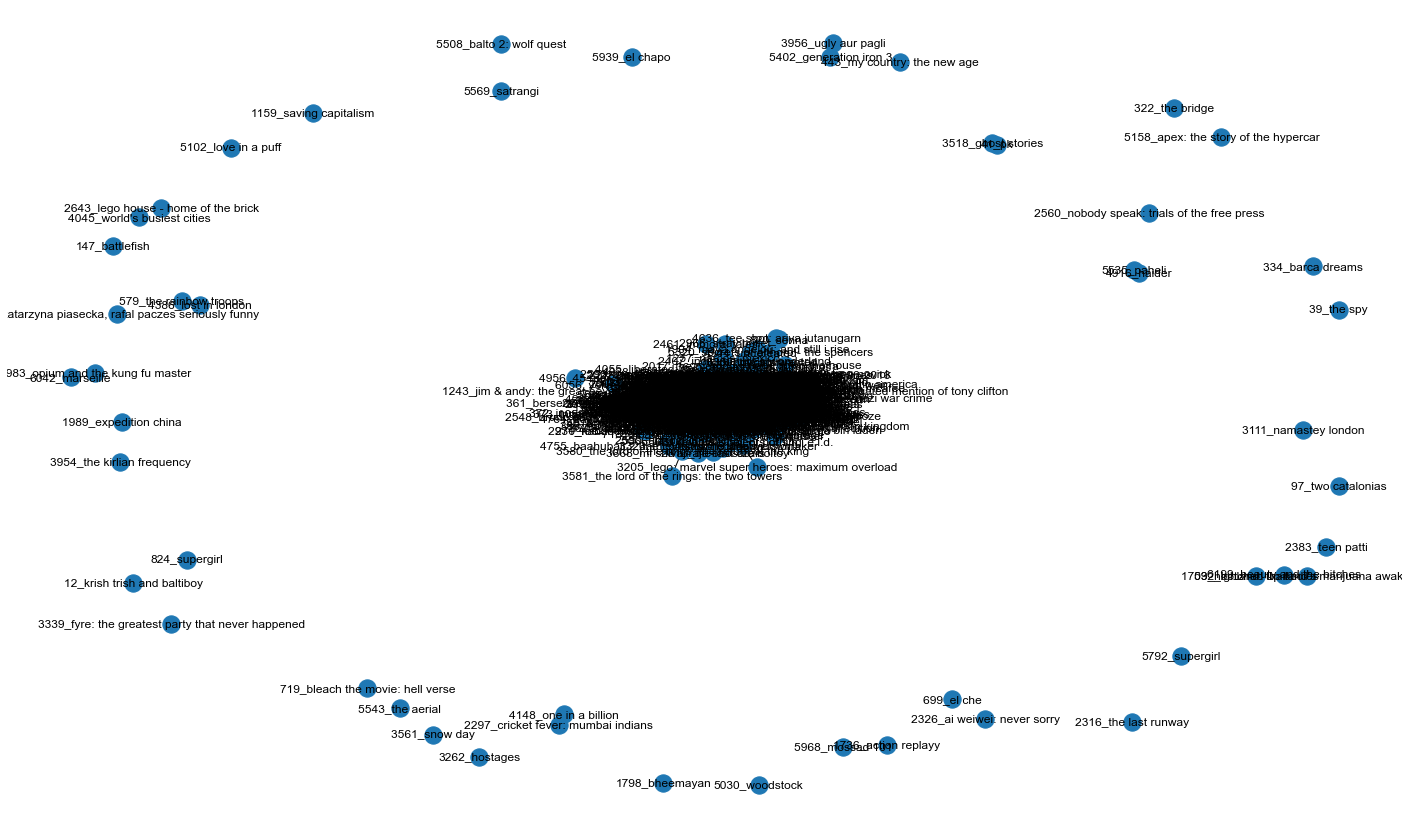

In [55]:
plt.figure(figsize=(25,15 ))
nx.draw_networkx(graph, pos=nx.layout.spring_layout(graph), 
                 cmap=plt.cm.rainbow
                )
plt.axis('off')
plt.show()

In [56]:
graph.number_of_nodes()

1307

In [57]:
graph.number_of_edges()
#node^2 이하가 되도록하기

123170

In [58]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 1307
Number of edges: 123170
Average degree: 188.4774


In [59]:
node2vec = Node2Vec(graph, dimensions=20, walk_length=16, num_walks=100,p = 0.5, q = 2, workers=2)

Computing transition probabilities:   0%|          | 0/1307 [00:00<?, ?it/s]

In [60]:
model=node2vec.fit(window=10,min_count=1)

In [61]:
title_nodes = [x for x in model.wv.vocab]
embeddings = (model.wv.vectors)

node_targets=select['listed_in']

In [62]:
node_targets

0       COMEDY
1       COMEDY
2       COMEDY
3       COMEDY
4       COMEDY
         ...  
1302      DOCU
1303      DOCU
1304      DOCU
1305      DOCU
1306      DOCU
Name: listed_in, Length: 1307, dtype: object

In [63]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

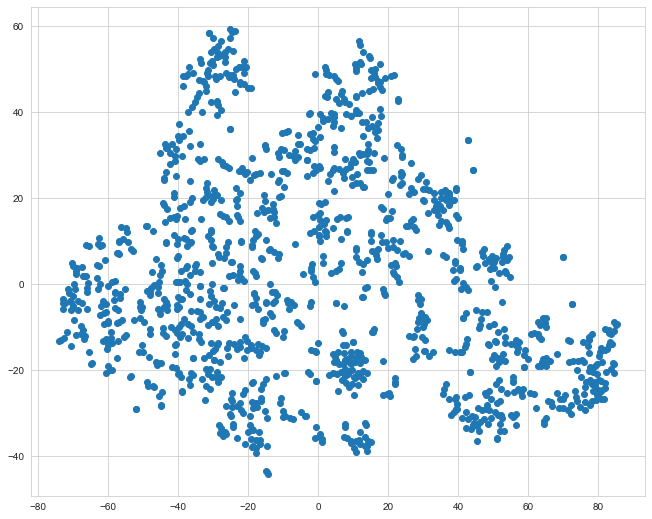

In [64]:

figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])


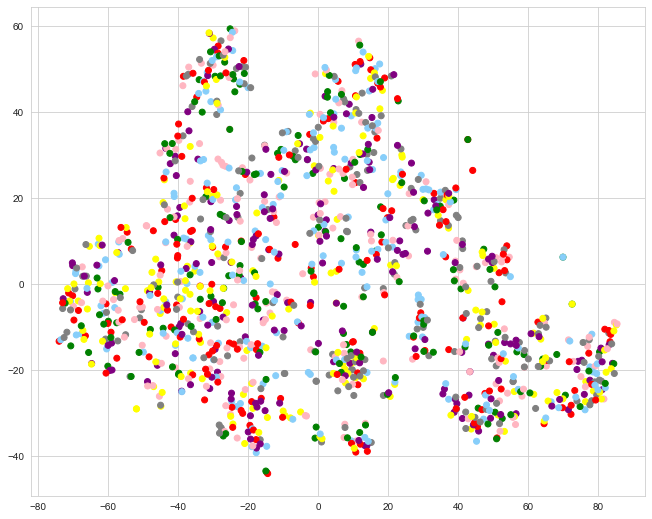

In [65]:
netflix_nodes=[x for x in model.wv.vocab]
genre_colors={
    'COMEDY':'lightskyblue',
    'FAMILY':'yellow',
    'SF':'purple',
    'ROMANTIC':'lightpink',
    'THRILLER':'r',
    'ACTION':'green',
    'DOCU':'gray'
      }
select['color']=select['listed_in'].apply(lambda x:genre_colors[x])
netflix_colors=dict(zip(select['title'],select['color']))
colors=[netflix_colors[x] for x in netflix_nodes]

figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
          c=colors)

In [66]:
#model.wv.save_word2vec_format('embeddings_net-2.emb')
#model.save('embeddings_net-2.model')

In [67]:
target=select['list'].values.tolist()

In [68]:
print(vectors_bert.shape)

(1307, 768)


In [69]:
embeddings_bert=np.concatenate((embeddings,vectors_bert),axis=1)
X = embeddings_bert
# X will hold the 20-dimensional input features
y = np.array(target)
# y holds the corresponding target values
print(y)

[[1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=True, random_state=42)

In [72]:
print(y_train)

[[1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]]


In [73]:
print(
    "Array shapes:\n X_train = {}\n y_train = {}\n X_test = {}\n y_test = {}".format(
        X_train.shape, y_train.shape, X_test.shape, y_test.shape
    )
)

Array shapes:
 X_train = (261, 788)
 y_train = (261, 7)
 X_test = (1046, 788)
 y_test = (1046, 7)


In [74]:
from sklearn.linear_model import LogisticRegressionCV

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [77]:
LR_multilabel = MultiOutputClassifier(estimator= LogisticRegression()).fit(X_train, y_train)
y_pred_LR=LR_multilabel.predict(X_test)
score_lr=accuracy_score(y_test, y_pred_LR)
score_lr

0.3489483747609943

In [78]:
score_LR=np.sum(np.sum(y_test & y_pred_LR, axis=1) > 0)/y_test.shape[0]
score_LR

0.6491395793499044

In [79]:

svm=LinearSVC(random_state=42)
#make it an multilabel classifier
svm_multilabel=MultiOutputClassifier(svm,n_jobs=-1)
svm_multilabel=svm_multilabel.fit(X_train, y_train)
y_pred_svm=svm_multilabel.predict(X_test)
score_svm=accuracy_score(y_test, y_pred_svm)
score_svm

0.31166347992351817

In [80]:
score_SVM=np.sum(np.sum(y_test & y_pred_svm, axis=1) > 0)/y_test.shape[0]
score_SVM

0.6883365200764818

In [81]:
mlp_multilabel = MLPClassifier(hidden_layer_sizes=(300,100), max_iter=10000, 
                               random_state=42).fit(X_train, y_train)
mlp_multilabel.score(X_test, y_test)

0.3776290630975143

In [82]:
y_pred = mlp_multilabel.predict(X_test)
score_MLP=np.sum(np.sum(y_test & y_pred, axis=1) > 0)/y_test.shape[0]
score_MLP

#이 코드는 예측(Y_pred)을 만들어 테스트 데이터(Y_test)의 각 원소에 대해 논리 곱(AND) 연산을 합니다. 
#즉 두 행렬의 같은 위치의 원소가 모두 True일 때만 True가 됩니다. 
#그리고 난 후 True의 개수가 0 보다 큰 행의 개수를 카운트했습니다.

0.6892925430210325

In [83]:
print('score(logistic regression): {}'.format(score_LR))
print('score(svm): {}'.format(score_SVM))
print('score(multi-layer perception): {}'.format(score_MLP))

score(logistic regression): 0.6491395793499044
score(svm): 0.6883365200764818
score(multi-layer perception): 0.6892925430210325
